<a href="https://colab.research.google.com/github/hufsaim/T10203101/blob/master/notebook/ch11_supp_Fourier_Analysis_sound_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

- 1초에 1만개의 sample을 이용하여, 1초 단위의 음들에 해당하신 신호를 미리 생성합니다.

In [18]:
# Create a sound
fr = 10000 # Samples per second
t1 = np.linspace(0,1,fr*1) # 1 second
Z = np.zeros(np.shape(t1)) # no singal
C = np.sin(2*np.pi*523*t1) # 523Hz sine wave
D = np.sin(2*np.pi*587*t1)
E = np.sin(2*np.pi*659*t1)
F = np.sin(2*np.pi*698*t1)
G = np.sin(2*np.pi*784*t1)

- 서로 다른 음을 나타내는 신호를 시간축에서 관찰해 봅니다.

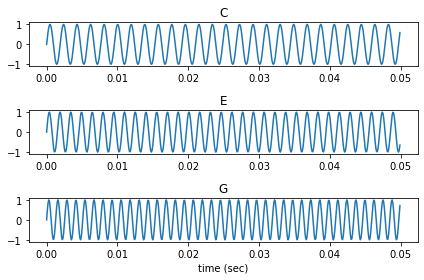

In [19]:
l = 500
plt.subplot(3,1,1)
plt.plot(t1[:l],C[:l])
plt.title('C')
plt.subplot(3,1,2)
plt.plot(t1[:l],E[:l])
plt.title('E')
plt.subplot(3,1,3)
plt.plot(t1[:l],G[:l])
plt.title('G')
plt.xlabel('time (sec)')
plt.tight_layout()
plt.show()

- 미리 준비한 1초 단위의 신호들을 연결하여 새로운 신호를 만들어 봅니다.

In [32]:
mydata = np.concatenate([Z,0.25*C,.75*D,Z,1.5*E,2*F,2.5*G,1.8*F,0.5*E,0.2*D,0.1*C,Z])
t = np.linspace(0,len(mydata)/fr,len(mydata))

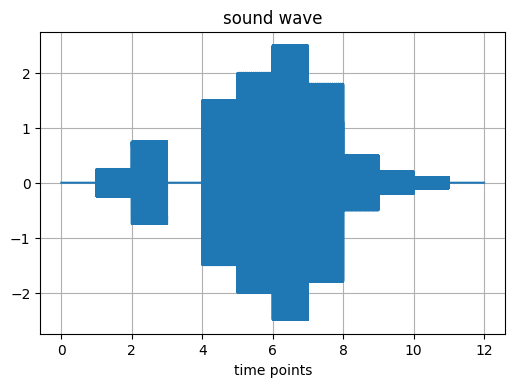

In [33]:
plt.figure(dpi=100)
plt.grid()
plt.plot(t,mydata)
plt.title("sound wave")
plt.xlabel('time points')
plt.show()

- 생성한 신호와 sampling rate를 입력으로 하여, 컴퓨터의 스피커를 통해 소리를 들어봅니다.

In [34]:
Audio(mydata,rate=fr)

- Fourier transform을 하여 spectrum을 살펴봅니다.

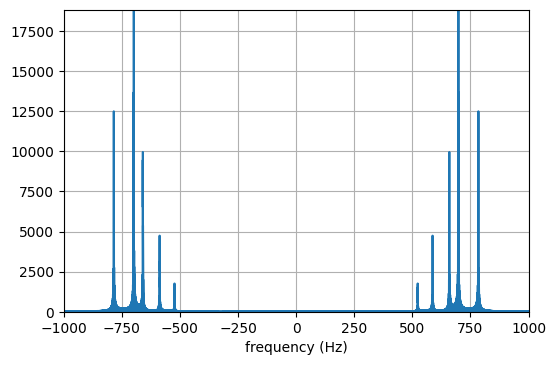

In [36]:
FS = np.fft.fft(mydata)
freq = np.fft.fftfreq(len(mydata),1/fr)
plt.figure(dpi=100)
plt.plot(freq,np.abs(FS))
plt.axis([-1000,1000,0,max(np.abs(FS))])
plt.grid()
plt.xlabel('frequency (Hz)')
plt.show()